<a href="https://colab.research.google.com/github/radar101/SEM-8/blob/main/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("IMDB Dataset.csv")

In [13]:
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [14]:
df.isnull().sum()

,0
review,0
sentiment,0


In [15]:
import seaborn as sns

<Axes: xlabel='sentiment', ylabel='count'>

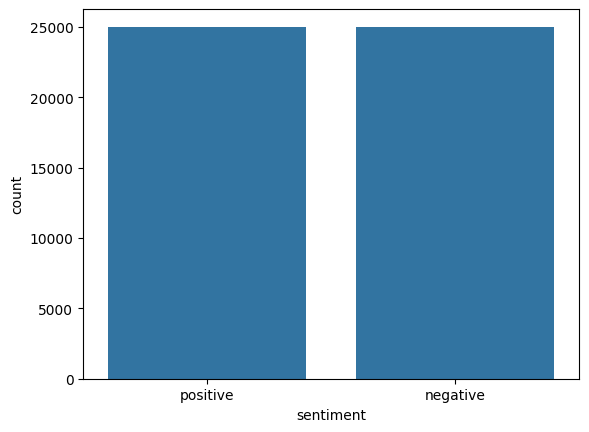

In [16]:
sns.countplot(data=df, x="sentiment")

In [17]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)


In [40]:
vocab_size = 10000
max_length = 200
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)


Initializes tokenizer for the top 10,000 words. <OOV> handles out-of-vocabulary words. Tokenizer is fit only on training data.

python
Copy
Edit


In [44]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
# Converts text data into sequences of integers based on word index from tokenizer.

In [47]:
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding="post", truncating="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding="post", truncating="post")
# Pads or truncates sequences to ensure uniform length (max_length=200), padding at the end (post).

In [48]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=16, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Constructs a DNN:

Embedding: Converts word indices into dense 16-dimensional vectors.

GlobalAveragePooling1D: Averages across all time steps.

Dense(32): Fully connected hidden layer with ReLU.

Dense(1): Output neuron with sigmoid for binary classification.

In [49]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6726 - loss: 0.5932 - val_accuracy: 0.8593 - val_loss: 0.3358
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8819 - loss: 0.2944 - val_accuracy: 0.8750 - val_loss: 0.3021
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9087 - loss: 0.2370 - val_accuracy: 0.8741 - val_loss: 0.3042
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9169 - loss: 0.2122 - val_accuracy: 0.8714 - val_loss: 0.3127
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9222 - loss: 0.1988 - val_accuracy: 0.8619 - val_loss: 0.3363
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9344 - loss: 0.1772 - val_accuracy: 0.8655 - val_loss: 0.3508
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9400 - loss: 0.1663 - val_accuracy: 0.8556 - val_loss: 0.3703
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9416 - loss: 0.1591 - 

In [53]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"\n✅ Test Loss: {loss:.2f}")
print(f"✅ Test Accuracy: {accuracy:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8635 - loss: 0.3863

✅ Test Loss: 0.39
✅ Test Accuracy: 0.86


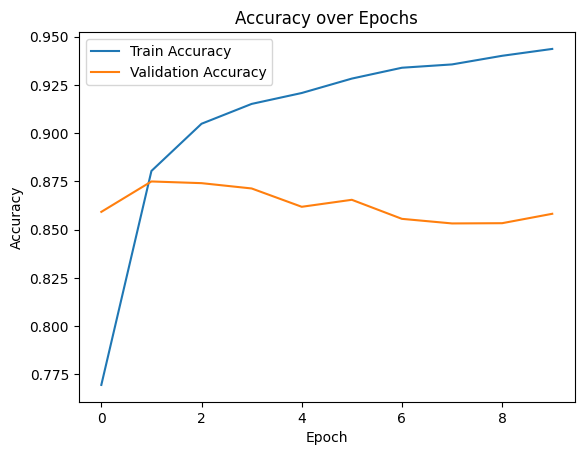

In [54]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [55]:
def predict_sentiment(review_text):
    seq = tokenizer.texts_to_sequences([review_text])
    pad = pad_sequences(seq, maxlen=max_length, padding='post', truncating='post')
    pred = model.predict(pad)[0][0]
    sentiment = "Positive" if pred > 0.5 else "Negative"
    return f"Predicted Sentiment: {sentiment} (Confidence: {pred:.2f})"


In [56]:
print(predict_sentiment(df['review'][99]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted Sentiment: Positive (Confidence: 1.00)


1. Q: What is the purpose of tokenization in this project?
A: Tokenization converts text into numerical sequences so that they can be fed into neural networks.

2. Q: Why do we use padding?
A: Padding ensures that all input sequences have the same length, which is necessary for batch processing in neural networks.

3. Q: What does the Embedding layer do?
A: The Embedding layer transforms word indices into dense vectors of fixed size, capturing semantic meaning.

4. Q: Why use GlobalAveragePooling1D()?
A: It reduces the output of the embedding layer by averaging across all word vectors, giving a fixed-size output regardless of input length.

5. Q: What loss function is used and why?
A: Binary crossentropy, because this is a binary classification task (positive/negative sentiment).

6. Q: Why is LabelEncoder used?
A: To convert string labels ("positive"/"negative") into integers (1/0) for training.

7. Q: What does the oov_token="<OOV>" do?
A: It represents unknown or out-of-vocabulary words not seen during training.

8. Q: Why is validation_split=0.2 used in training?
A: To monitor the model’s performance on unseen data during training and prevent overfitting.

9. Q: What optimizer is used and why?
A: Adam optimizer, because it combines the benefits of both AdaGrad and RMSProp, making it efficient for most problems.

10. Q: What is the role of Sequential model?
A: It allows stacking layers in a linear fashion, suitable for simple feed-forward networks.

11. Q: Why is sigmoid used in the final layer?
A: To output a probability between 0 and 1 for binary classification.

12. Q: How is accuracy calculated during training?
A: It is the ratio of correctly predicted labels to total predictions.